In [5]:
from scipy import stats
import pandas as pd
import pandas_datareader as web

Help on class DataFrame in module pandas.core.frame:

class DataFrame(pandas.core.generic.NDFrame)
 |  Two-dimensional size-mutable, potentially heterogeneous tabular data
 |  structure with labeled axes (rows and columns). Arithmetic operations
 |  align on both row and column labels. Can be thought of as a dict-like
 |  container for Series objects. The primary pandas data structure
 |  
 |  Parameters
 |  ----------
 |  data : numpy ndarray (structured or homogeneous), dict, or DataFrame
 |      Dict can contain Series, arrays, constants, or list-like objects
 |  index : Index or array-like
 |      Index to use for resulting frame. Will default to np.arange(n) if
 |      no indexing information part of input data and no index provided
 |  columns : Index or array-like
 |      Column labels to use for resulting frame. Will default to
 |      np.arange(n) if no column labels are provided
 |  dtype : dtype, default None
 |      Data type to force, otherwise infer
 |  copy : boolean, de

In [21]:
start = pd.to_datetime('2010-01-04')
end = pd.to_datetime('2017-07-25')
spy_etf = web.DataReader('SPY', 'yahoo', start,end)

In [8]:
spy_etf.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,96.341141,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,96.596169,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,96.664169,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,97.072220,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,97.395248,126402800


In [10]:
aapl = web.DataReader('AAPL', 'yahoo', start,end)

In [11]:
aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,30.490000,30.642857,30.340000,30.572857,20.696495,123432400
2010-01-05,30.657143,30.798571,30.464285,30.625713,20.732277,150476200
2010-01-06,30.625713,30.747143,30.107143,30.138571,20.402506,138040000
2010-01-07,30.250000,30.285715,29.864286,30.082857,20.364788,119282800
2010-01-08,30.042856,30.285715,29.865715,30.282858,20.500175,111902700


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

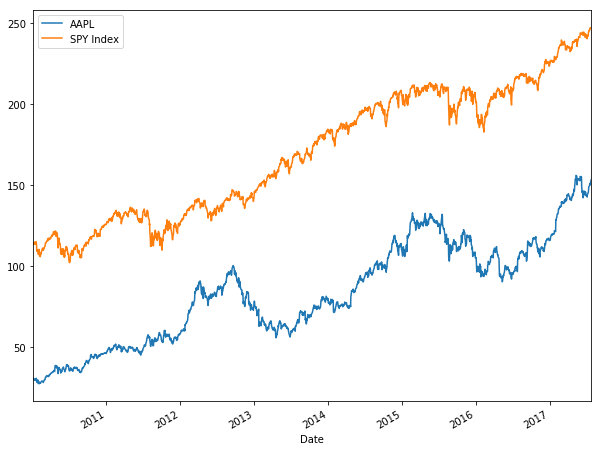

In [22]:
aapl['Close'].plot(label='AAPL', figsize=(10,8))
spy_etf['Close'].plot(label='SPY Index')
plt.legend()

In [23]:
aapl['Cumulative'] = aapl['Close']/aapl['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close']/spy_etf['Close'].iloc[0]

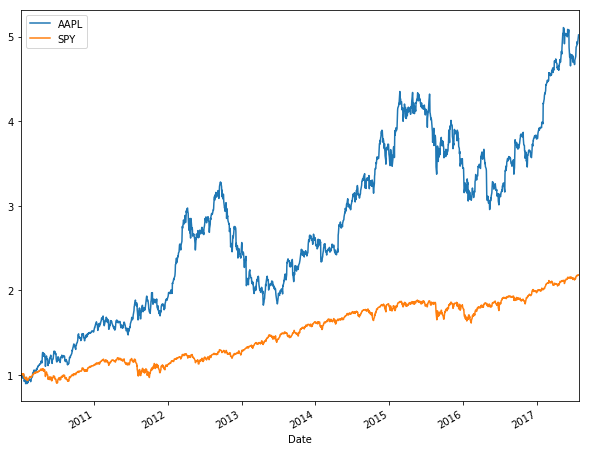

In [24]:
aapl['Cumulative'].plot(label='AAPL', figsize=(10,8))
spy_etf['Cumulative'].plot(label='SPY')
plt.legend()

In [25]:
aapl['Daily Return'] = aapl['Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

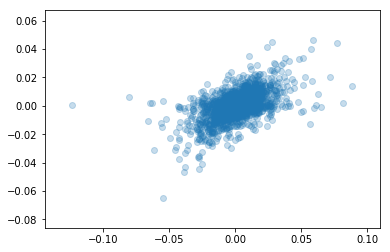

In [30]:
plt.scatter(aapl['Daily Return'],spy_etf['Daily Return'], alpha=0.25)

In [31]:
beta, alpha, r_value, p_value, std_err = stats.linregress(aapl['Daily Return'].iloc[1:], spy_etf['Daily Return'].iloc[1:])

In [32]:
beta

0.3259391869941709

In [33]:
alpha

0.00013631862732178904

In [34]:
r_value

0.55594314165079062

In [35]:
spy_etf['Daily Return'].head()

Date
2010-01-04         NaN
2010-01-05    0.002647
2010-01-06    0.000704
2010-01-07    0.004221
2010-01-08    0.003328
Name: Daily Return, dtype: float64

In [36]:
import numpy as np

In [38]:
noise = np.random.normal(0, 0.001, len(spy_etf['Daily Return'].iloc[1:]))

In [39]:
noise

array([  1.73148364e-03,  -1.07733025e-03,   3.65255579e-05, ...,
         9.98229618e-04,   4.98853674e-04,  -4.24170947e-04])

In [41]:
fake_stock = spy_etf['Daily Return'].iloc[1:] + noise

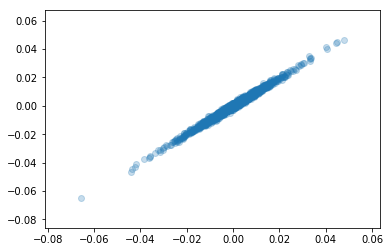

In [42]:
plt.scatter(fake_stock, spy_etf['Daily Return'].iloc[1:], alpha=.25)

In [43]:
beta, alpha, r_value, p_value, std_err = stats.linregress(fake_stock, spy_etf['Daily Return'].iloc[1:])

In [44]:
beta

0.98597625220648

In [45]:
alpha

1.2552153022975026e-05